<a href="https://colab.research.google.com/github/obichidi/Machine-learning-Assessments/blob/main/TimeSeries_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# import lightgbm as lgb
from pmdarima import model_selection
import numpy as np
import statsmodels.tsa.api as smt
# from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
from  statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import statsmodels.tsa.stattools as sts
# from random import randrange
# import lightgbm as lgb
from pandas import Series
from scipy import signal
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
# from tqdm import tqdm_notebook
from pmdarima.utils.array import diff

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
from sklearn.metrics import mean_absolute_error




from sktime.forecasting.theta import ThetaForecaster

import matplotlib.pyplot as  plt
from scipy.stats.distributions import chi2 
import seaborn as sn
from sklearn import metrics
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = '/content/drive/MyDrive/d213_assessment'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/d213_assessment/teleco_time_series .csv')

In [ ]:
df

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
...,...,...
726,727,16.931559
727,728,17.490666
728,729,16.803638
729,730,16.194813


731 days  = 2 years and 2 days.

In [ ]:
df.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,9.822901
std,211.165812,3.852645
min,1.000000,0.000000
25%,183.500000,6.872836
50%,366.000000,10.785571
75%,548.500000,12.566911
max,731.000000,18.154769


Check null values

In [ ]:
df.isna()

,Day,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
726,False,False
727,False,False
728,False,False
729,False,False


check the sun of null vawlues

In [ ]:
df.isna().sum()

Day        0
Revenue    0
dtype: int64

plot dataframe

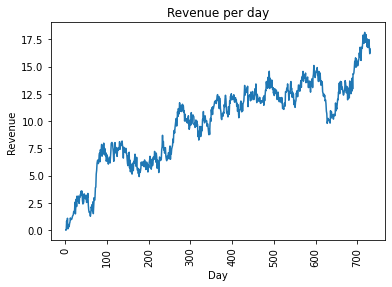

In [ ]:
plt.plot(df['Day'],df['Revenue'])
plt.title('Revenue per day')
plt.ylabel('Revenue')
plt.xlabel('Day')
plt.xticks(rotation = 90)
plt.show();

In [ ]:
df.set_index('Day', inplace=True)

In [ ]:
def stats_plot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    dftest = adfuller(y)        
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)



Results of Dickey-Fuller Test: 

Test Statistic                  -1.924612
p-value                          0.320573
#Lags Used                       1.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64


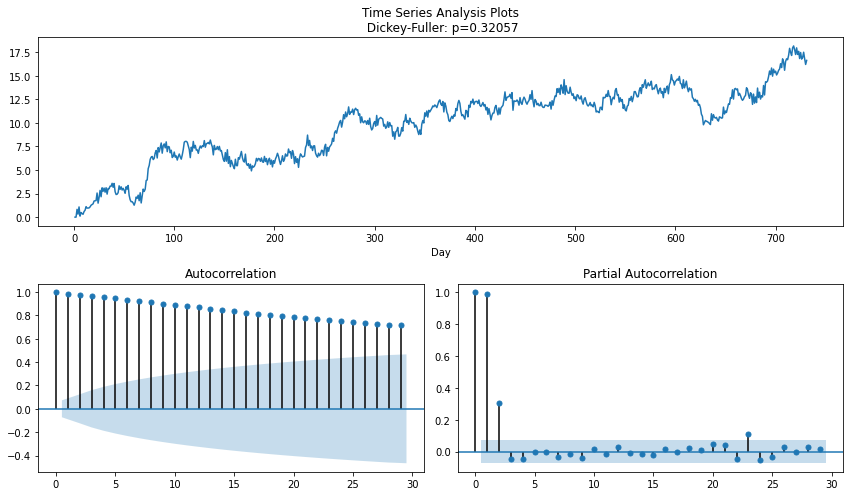

In [ ]:
stats_plot(df['Revenue'])

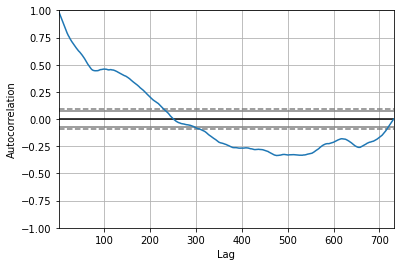

In [ ]:
autocorrelation_plot(df.Revenue)
plt.show()

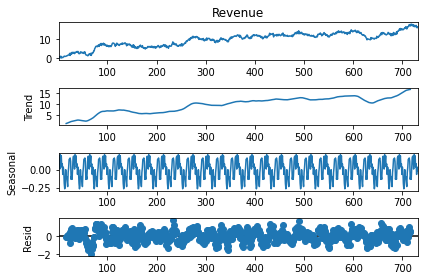

In [ ]:
results = seasonal_decompose(df.Revenue, model="additive", period =30)
results.plot()
plt.show()

In [ ]:
hw_model = ExponentialSmoothing(df.Revenue.tolist())
model_fit = hw_model.fit()

In [ ]:
yhat = model_fit.predict(1, len(df)) 

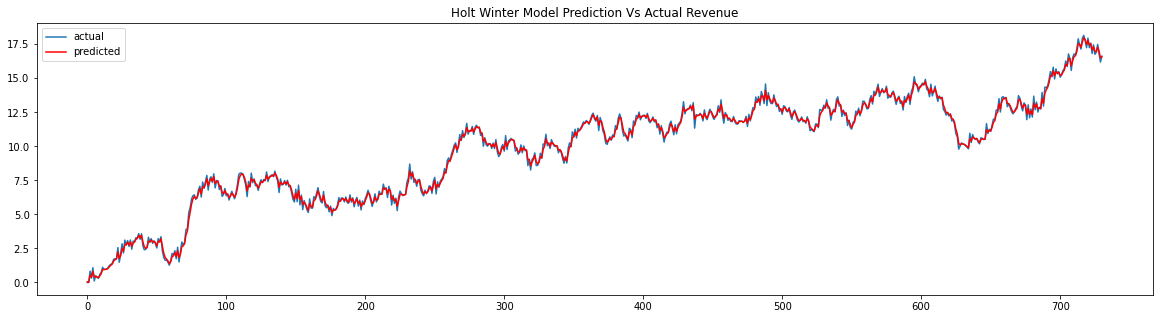

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df.Revenue.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Holt Winter Model Prediction Vs Actual Revenue")
plt.legend(["actual", "predicted"])

plt.show()

In [ ]:
df["diff_1_Revenue"] = df.Revenue.diff(1)

In [ ]:
df.diff_1_Revenue

Day
1           NaN
2      0.000793
3      0.824749
4     -0.505210
5      0.762222
         ...   
727    0.170280
728    0.559108
729   -0.687028
730   -0.608824
731    0.425985
Name: diff_1_Revenue, Length: 731, dtype: float64

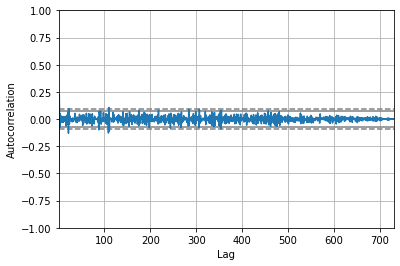

In [ ]:
autocorrelation_plot(df.diff_1_Revenue[1:])
plt.show()


Results of Dickey-Fuller Test: 

Test Statistic                 -44.874527
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64


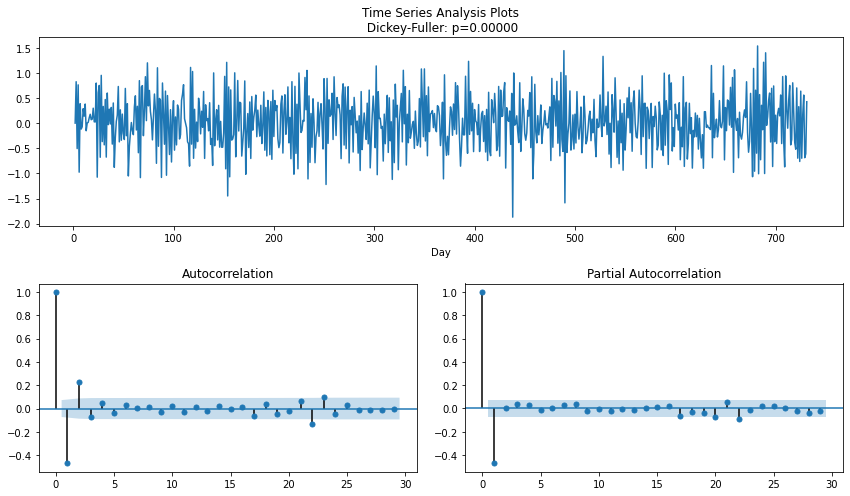

In [ ]:
stats_plot(df['diff_1_Revenue'][1:])

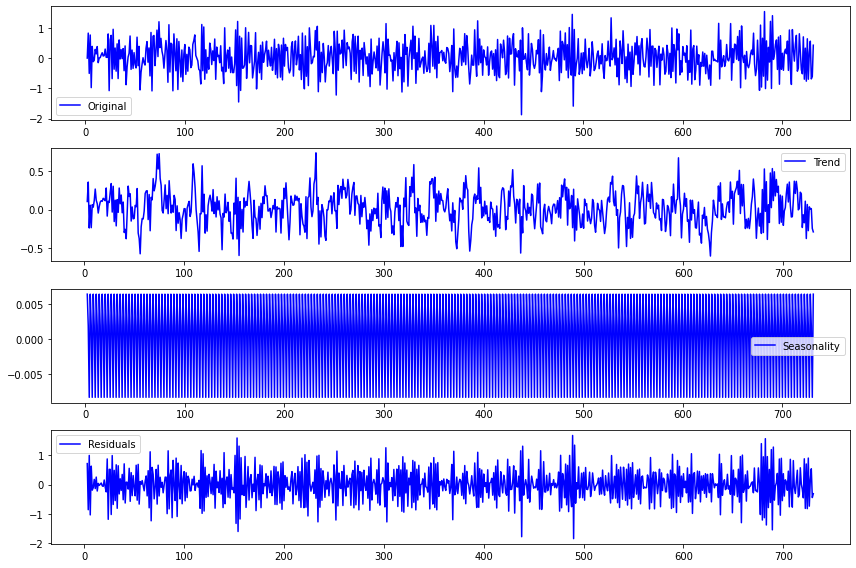

In [ ]:
# results = seasonal_decompose(df['diff_1_Revenue'][1:], model="additive", period = 3)
# results.plot()
# plt.show()

# Apply seasonal_decompose 
decomposition = seasonal_decompose(df['diff_1_Revenue'][1:], period = 3)
    
# Get trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['diff_1_Revenue'][1:], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()




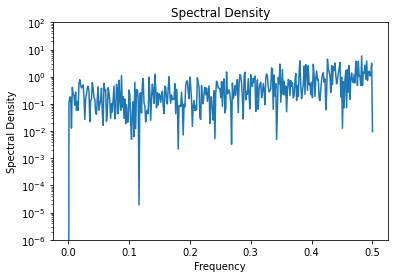

In [ ]:
f, Pxx_den = signal.periodogram(df['diff_1_Revenue'][1:])
plt.semilogy(f,Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

In [ ]:
test_len = int(len(df['diff_1_Revenue'][1:]) * 0.2)
train, test = df['diff_1_Revenue'][1:].iloc[:-test_len], df['diff_1_Revenue'][1:].iloc[-test_len:]


train_df = pd.DataFrame(data=train)
train_df.to_csv('train.csv')

test_df = pd.DataFrame(data=test)
test_df.to_csv('test.csv')
# test_len = int(len(diff) * 0.2)
# train, test = diff.iloc[:-test_len], diff.iloc[-test_len:]

# train, test = model_selection.train_test_split(df, train_size=488)

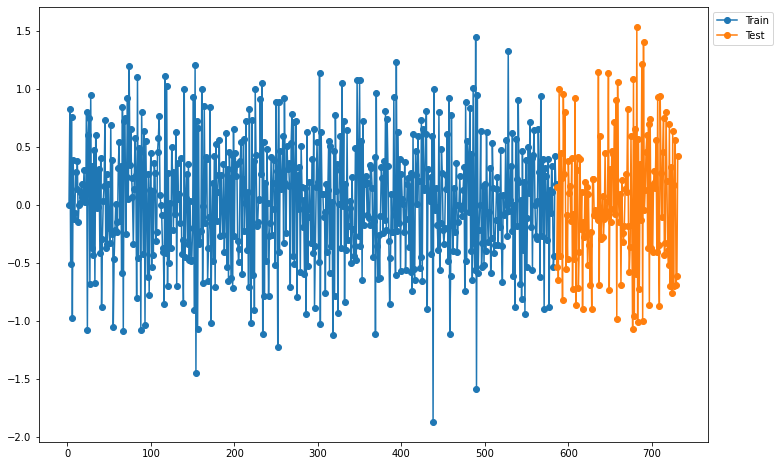

In [ ]:
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:
test.to_csv('test.csv')
train.to_csv('train.csv')

In [ ]:
model = auto_arima(train, start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  584
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -383.946
Date:                Tue, 10 May 2022   AIC                            773.893
Time:                        00:39:50   BIC                            787.002
Sample:                             0   HQIC                           779.002
                                - 584                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0341      0.019      1.751      0.080      -0.004       0.072
ar.L1         -0.4597      0.036    -12.654      0.000      -0.531      -0.388
sigma2         0.2180      0.014     16.034      0.000       0.191       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.96   Prob(JB):                         0.40
Heteroskedasticity (H):               0.97   Skew:                            -0.08
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

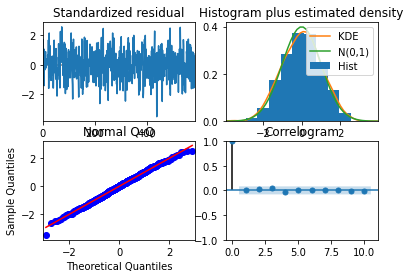

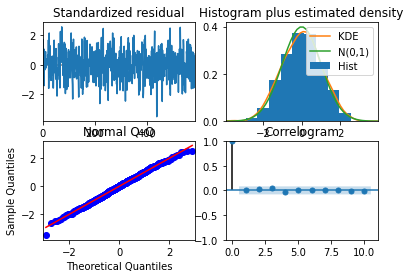

In [ ]:
model.plot_diagnostics()

In [ ]:


def plot_forecast(train, test, forecast, forecast_int=None):

    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)

    plt.figure(figsize=(12, 6))
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}", size=18)
    train.plot(label="train", color="b")
    test.plot(label="test", color="g")
    forecast.index = test.index
    forecast.plot(label="forecast", color="r")
    if forecast_int is not None:
        plt.fill_between(
            test.index,
            forecast_int["lower"],
            forecast_int["upper"],
            alpha=0.2,
            color="dimgray",
        )
    plt.legend(prop={"size": 16})
    plt.show()

    return mae, mape

In [ ]:
fh = np.arange(1, 90)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])

In [ ]:

from sktime.forecasting.arima import ARIMA


y = test
forecaster = ARIMA(
    order=(1, 1, 0),
    # seasonal_order=(0, 1, 0, 12),
    suppress_warnings=True)
forecaster.fit(y)
ARIMA(...)
y_pred = forecaster.predict(fh=[1,2,3,4,5,6,7])


print(y_pred)

732   -0.356460
733    0.239746
734   -0.209955
735    0.133816
736   -0.124377
737    0.074108
738   -0.073864
dtype: float64


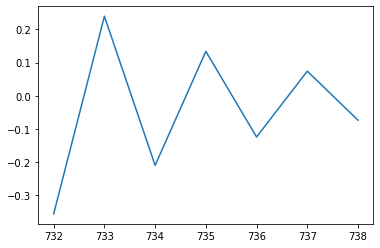

In [ ]:
plt.plot(y_pred)

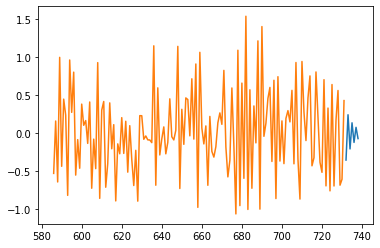

In [ ]:
plt.plot(y_pred)
plt.plot(test)